<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-and-Reviewing-Data" data-toc-modified-id="Importing-and-Reviewing-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing and Reviewing Data</a></span></li><li><span><a href="#Processing-Data-for-Modeling" data-toc-modified-id="Processing-Data-for-Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Processing Data for Modeling</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Testing-Data" data-toc-modified-id="Testing-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Testing Data</a></span></li><li><span><a href="#Training-Data" data-toc-modified-id="Training-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Training Data</a></span></li><li><span><a href="#Data-Manipulation" data-toc-modified-id="Data-Manipulation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data Manipulation</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>PCA</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#K-Neighbors" data-toc-modified-id="K-Neighbors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>K Neighbors</a></span></li><li><span><a href="#Random-Forest-Classification" data-toc-modified-id="Random-Forest-Classification-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest Classification</a></span><ul class="toc-item"><li><span><a href="#Modeling-with-RF" data-toc-modified-id="Modeling-with-RF-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Modeling with RF</a></span></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#Modeling-with-GB" data-toc-modified-id="Modeling-with-GB-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Modeling with GB</a></span></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#Modeling-with-XGB" data-toc-modified-id="Modeling-with-XGB-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Modeling with XGB</a></span></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li></ul></li><li><span><a href="#Modeling-Conclusion" data-toc-modified-id="Modeling-Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling Conclusion</a></span></li></ul></div>

# Modeling

In [185]:
# %load Imports.py
#Imports
##General
import pandas as pd
import numpy as np

##Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

#Modeling
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Modeling with XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

##Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

## Importing and Reviewing Data

In [2]:
#Cleaned Training and Testing Data
X_train = pd.read_csv("Data/Final/Train1.csv")
y_train = pd.read_csv("Data/Raw/Train_Labels.csv")

Final_test = pd.read_csv("Data/Final/Test1.csv")

In [207]:
#Well Elevation Data
X_train_ele = pd.read_csv("Data/Processed/Train2.csv")
Final_train_ele = pd.read_csv("Data/Processed/Test2.csv")

In [213]:
X_train['elevation'] = X_train_ele['elevations']
Final_test['elevation'] = Final_train_ele['elevations']

In [209]:
X_train.drop(axis = 1,  columns = ['subvillage', 'ward', 'wpt_name', 'scheme_name', 'date_recorded'], inplace = True)
Final_test.drop(axis = 1,  columns = ['subvillage', 'ward', 'wpt_name', 'scheme_name', 'date_recorded'], inplace = True)

In [210]:
len(X_train[X_train['elevation'] == -1])

59400

The following categorical features have over 150 different levels, and will be dropped from both data sets to prevent overfitting. In all cases there exist more parsimonious versions of the information in the data.
+ `scheme_name`
+ `ward`
+ `subvillage`
+ `wpt`

I'll also be dropping `date_recorded`, for now.

In [3]:
X_train.drop(axis = 1, columns = ['date_recorded', 'subvillage', 'wpt_name', 'ward', 'scheme_name'], inplace = True)
Final_test.drop(axis = 1, columns = ['date_recorded', 'subvillage', 'wpt_name', 'ward', 'scheme_name'], inplace = True)

In [4]:
pd.set_option('display.max_columns', 40)
X_train.head()

,id,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Interped_pop
0,69572.0,6000.000000,1390.0,34.938093,-9.856322,Lake Nyasa,Njombe,11.0,5.0,Ludewa,109.000000,True,VWC,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0.0
1,8776.0,542.857143,1399.0,34.698766,-2.147466,Lake Victoria,Mara,20.0,2.0,Serengeti,280.000000,Unknown,Other,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0.0
2,34310.0,25.000000,686.0,37.460664,-3.821329,Pangani,Manyara,21.0,4.0,Simanjiro,250.000000,True,VWC,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0.0
3,67743.0,525.000000,263.0,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90.0,63.0,Nanyumbu,58.000000,True,VWC,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0.0
4,19728.0,0.000000,0.0,31.130847,-1.825359,Lake Victoria,Kagera,18.0,1.0,Karagwe,984.846154,True,Unknown,True,1996.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1.0


In [5]:
y_train.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


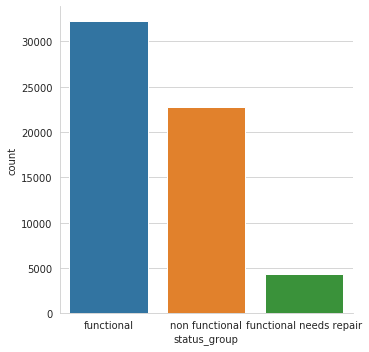

In [6]:
sns.catplot(x = 'status_group', kind = "count", data = y_train)

## Processing Data for Modeling
In order to process the data for modeling, I want to follow the following steps.
1. Use scikit-learn's `StandardScaler` to scale my numeric feature values.
2. Use scikit-learn's `LabelEncoder` to encode my categorical features.
3. Convert 'region_code' and 'district_code' to categorical

### Functions

In [108]:
#Getting Numerical Vars
def get_nums(data):
    #List of Categorical Features

    num_feats = []
    for feat in data.dtypes.index:
        if data[feat].dtype == "float64":
            num_feats.append(feat)
    return(num_feats)

#Encoding Numerical Vars
def scaling_nums(data, to_scale, train = True, train_data = None):
    std_scal = StandardScaler()
    #Label encoding when working with training data
    #When train = True, no need for train_data
    if train:
        data[to_scale] = std_scal.fit_transform(data[to_scale])
    #Since I want to fit the testing data based on the training data fit
    #Now need the train_data param
    else:
        std_scal.fit(train_data[to_scale])
        data[to_scale] = std_scal.transform(data[to_scale])
    return(data)

#Getting Categorical Vars
def get_cats(data):
    #List of Categorical Features

    cat_feats = []
    for feat in data.dtypes.index:
        if data[feat].dtype == "object":
            cat_feats.append(feat)
    return(cat_feats)

#Encoding Categorical Vars
def encoding_cats(data, train = True, train_data = None):
    #getting cat_feats
    cat_feats = get_cats(data)
    lab_encoder = LabelEncoder()
    #Label encoding when working with training data
    #When train = True, no need for train_data
    if train:
        for feat in cat_feats:
            encoded_col = "{}_encoded".format(feat)
            data[encoded_col] = lab_encoder.fit_transform(data[feat])
    #Since I want to fit the testing data based on the training data fit
    #Now need the train_data param
    else:
        for feat in cat_feats:
            encoded_col = "{}_encoded".format(feat)
            lab_encoder.fit(train_data[feat])
            data[encoded_col] = lab_encoder.transform(data[feat])
    data.drop(axis = 1, columns = cat_feats, inplace = True)
    return(data)

#Convert Region_code and District_code to Categorical
def to_category(data, to_cater):
    add_to_cater = get_cats(data)
    to_cater = to_cater.append(add_to_cater)
    for feat in to_cater:
        data[feat] = data[feat].astype('category')
    return(data)

#Dates

def as_dates(data):
    data.date_recorded = pd.to_datetime(data.date_recorded)
    return(data)

### Testing Data

In [8]:
Final_test = encoding_cats(Final_test, train = False, train_data = X_train)

In [9]:
Final_test.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,Interped_pop,basin_encoded,region_encoded,lga_encoded,public_meeting_encoded,scheme_management_encoded,permit_encoded,extraction_type_encoded,extraction_type_group_encoded,extraction_type_class_encoded,management_encoded,management_group_encoded,payment_encoded,payment_type_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,quantity_group_encoded,source_encoded,source_type_encoded,source_class_encoded,waterpoint_type_encoded,waterpoint_type_group_encoded
0,50785.0,4687.500000,1996.0,35.290799,-4.059696,21.0,3.0,321.0,2012.0,0.0,0,10,78,1,3,1,9,6,3,3,2,0,2,6,2,3,3,5,3,1,6,5
1,51630.0,1970.352941,1569.0,36.656709,-3.309214,2.0,2.0,300.0,2000.0,0.0,5,0,0,1,8,1,3,1,0,7,4,0,2,6,2,2,2,8,6,0,1,1
2,17168.0,200.000000,1567.0,34.767863,-5.004344,13.0,2.0,500.0,2010.0,0.0,0,22,25,1,8,2,9,6,3,7,4,0,2,6,2,2,2,5,3,1,6,5
3,45559.0,225.142857,267.0,38.058046,-9.418672,80.0,43.0,250.0,1987.0,0.0,7,9,62,2,8,1,9,6,3,7,4,6,6,6,2,0,0,7,5,0,6,5
4,49871.0,500.000000,1260.0,35.006123,-10.950412,10.0,3.0,60.0,2000.0,0.0,7,19,75,2,11,1,3,1,0,9,4,3,1,6,2,1,1,8,6,0,1,1


### Training Data

In [10]:
#to_scale= ['amount_tsh', 'population']

In [11]:
#X_train = scaling_nums(X_train, to_scale)

In [12]:
X_train = encoding_cats(X_train)

In [13]:
X_train.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,Interped_pop,basin_encoded,region_encoded,lga_encoded,public_meeting_encoded,scheme_management_encoded,permit_encoded,extraction_type_encoded,extraction_type_group_encoded,extraction_type_class_encoded,management_encoded,management_group_encoded,payment_encoded,payment_type_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,quantity_group_encoded,source_encoded,source_type_encoded,source_class_encoded,waterpoint_type_encoded,waterpoint_type_group_encoded
0,69572.0,6000.000000,1390.0,34.938093,-9.856322,11.0,5.0,109.000000,1999.0,0.0,1,16,64,1,8,0,3,1,0,7,4,2,0,6,2,1,1,8,6,0,1,1
1,8776.0,542.857143,1399.0,34.698766,-2.147466,20.0,2.0,280.000000,2010.0,0.0,4,11,124,2,2,1,3,1,0,11,4,0,2,6,2,2,2,5,3,1,1,1
2,34310.0,25.000000,686.0,37.460664,-3.821329,21.0,4.0,250.000000,2009.0,0.0,5,10,129,1,8,1,3,1,0,7,4,4,5,6,2,1,1,0,1,1,2,1
3,67743.0,525.000000,263.0,38.486161,-11.155298,90.0,63.0,58.000000,1986.0,0.0,7,14,105,1,8,1,14,10,5,7,4,0,2,6,2,0,0,3,0,0,2,1
4,19728.0,0.000000,0.0,31.130847,-1.825359,18.0,1.0,984.846154,1996.0,1.0,4,5,37,1,7,1,3,1,0,1,1,0,2,6,2,3,3,5,3,1,1,1


In [14]:
X_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,Interped_pop,basin_encoded,region_encoded,lga_encoded,public_meeting_encoded,scheme_management_encoded,permit_encoded,extraction_type_encoded,extraction_type_group_encoded,extraction_type_class_encoded,management_encoded,management_group_encoded,payment_encoded,payment_type_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,quantity_group_encoded,source_encoded,source_type_encoded,source_class_encoded,waterpoint_type_encoded,waterpoint_type_group_encoded
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.00000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,809.849232,668.297239,35.096379,-5.802882,15.297003,5.629747,394.740563,1996.654581,0.359949,4.077172,12.325993,73.360000,0.971027,8.068956,0.75697,6.331279,3.936549,1.264663,7.275741,3.638418,2.318013,2.842104,5.754293,2.263047,1.325758,1.325758,6.063199,3.970556,0.233737,2.574091,2.056212
std,21453.128371,4217.185108,693.116350,2.589802,2.805738,17.587406,9.633649,755.170414,10.135374,0.479989,2.473082,6.894390,42.449854,0.374689,2.084833,0.53560,4.213948,3.527073,1.626676,2.045373,1.058579,2.271259,1.836111,0.900820,0.784268,0.803750,0.803750,2.034190,2.191798,0.434129,1.781438,1.378937
min,0.000000,0.000000,-90.000000,29.607122,-11.649440,1.000000,0.000000,1.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.272160,-8.540621,5.000000,2.000000,89.000000,1995.000000,0.000000,2.000000,7.000000,38.000000,1.000000,8.000000,0.00000,3.000000,1.000000,0.000000,7.000000,4.000000,0.000000,2.000000,6.000000,2.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000,1.000000
50%,37061.500000,50.000000,369.000000,34.908743,-5.021597,12.000000,3.000000,242.739726,1996.000000,0.000000,4.000000,12.000000,73.000000,1.000000,8.000000,1.00000,4.000000,2.000000,1.000000,7.000000,4.000000,2.000000,2.000000,6.000000,2.000000,1.000000,1.000000,7.000000,5.000000,0.000000,2.000000,1.000000
75%,55656.500000,535.294118,1319.250000,37.178387,-3.326156,17.000000,5.000000,461.500000,2004.000000,1.000000,6.000000,18.000000,110.000000,1.000000,8.000000,1.00000,9.000000,6.000000,2.000000,7.000000,4.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,8.000000,6.000000,0.000000,4.000000,3.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-0.998464,99.000000,80.000000,56596.000000,2013.000000,1.000000,8.000000,24.000000,147.000000,2.000000,12.000000,2.00000,17.000000,12.000000,6.000000,11.000000,4.000000,6.000000,6.000000,7.000000,5.000000,4.000000,4.000000,9.000000,6.000000,2.000000,6.000000,5.000000


In [15]:
X_train['quantity_encoded'].equals(X_train['quantity_group_encoded'])

True

In [16]:
X_train['payment_encoded'].equals(X_train['payment_type_encoded'])

False

The two quantity features, `quantity_encoded` and `quantity_group_encoded` are perfectly equal. I'll drop the later, since it doesn't add any additional information to the estimates.

In [17]:
X_train.drop(axis = 1, columns = 'quantity_encoded', inplace = True)
Final_test.drop(axis = 1, columns = 'quantity_encoded', inplace = True)

### Data Manipulation

#### PCA

In [211]:
scaled_df = pd.read_csv("Data/Final/Train1.csv")

In [212]:
scaled_df.drop(axis = 1, columns = ['id','quantity', 'date_recorded', 'subvillage', 'wpt_name', 'ward', 'scheme_name'], inplace = True)

In [213]:
SE = StandardScaler()

In [214]:
scaled_df.iloc[:, [0, 1, 2, 3, 9, 13, ]] = SE.fit_transform(scaled_df.iloc[:, [0, 1, 2, 3, 9, 13, ]])

In [215]:
scaled_df = pd.get_dummies(train_pca, drop_first=True)

In [216]:
scaled_df.head()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,Interped_pop,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Geita,...,source_unknown,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,1.230725,1.041252,-0.061120,-1.444709,11.0,5.0,-0.378382,0.231411,0.0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
1,-0.063311,1.054237,-0.153532,1.302847,20.0,2.0,-0.151941,1.316728,0.0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,-0.186109,0.025541,0.912929,0.706256,21.0,4.0,-0.191668,1.218063,0.0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3,-0.067545,-0.584751,1.308907,-1.907684,90.0,63.0,-0.445917,-1.051236,0.0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,-0.192037,-0.964200,-1.531223,1.417651,18.0,1.0,0.781427,-0.064584,1.0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0


In [266]:
pca = PCA(n_components = 3)

In [269]:
components = pca.fit_transform(scaled_df)

In [279]:
ex_var = round(pca.explained_variance_ratio_.sum(), 4)*100
print("{}% of the variance is explained by the first three partial components".format(ex_var))

96.28% of the variance is explained by the first three partial components


In [270]:
components_df = pd.DataFrame(data = components, columns = ["PCA 1", "PCA 2", "PCA 3"])

In [271]:
components_df = pd.concat([components_df, y_train['status_group']], axis = 1)

In [272]:
scaled_df = pd.concat([scaled_df, y_train['status_group']], axis = 1)

In [273]:
predictors_pca = [x for x in compenents_df.columns if x not in ['status_group']]

## Modeling

In [46]:
#Splitting the training and testing data
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train.iloc[:, 1:], y_train.iloc[:, 1:], test_size = 0.2, random_state = 84)

In [19]:
dtrain = X_train.iloc[:, 1:].copy()
dtrain['status_group'] = y_train['status_group'].copy()
predictors = [x for x in dtrain.columns if x not in ['status_group']]

In [202]:
#Validation Function:
#Adding random shuffle to cross validation folds

def rand_shuf_cv(model, n_folds, train_values = X_train.values, y_train_values = y_train.values):
    kfolds = KFold(n_folds, shuffle=True, random_state = 84)
    acc = np.sqrt(-cross_val_score(model, train_values, y_train_values, scoring = "accuracy", cv = kfolds))
    return(acc)

In [21]:
def modelfit(alg, dtrain, predictors, target, preformCV = True, cv_folds = 5, objective = "reg", print_feat_imp = False):
    
    """
    A Model fitting algorithm for sklearn models. The default setup is for regression tasks, but it also supportes
    functionality for classification as well. The objective is set to "reg" for the default regression, if you need
    classification, use objective = "class". 
    Print_feat_imp is set to false by default, as it should only be run if the model has module .feature_importances.
    """
    
    #Fitting the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
    
    #Predicting Training Set
    dtrain_predictions = alg.predict(dtrain[predictors])   
    if objective == "class":
        dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Preforming Cross Validation
    if preformCV:
        from sklearn.model_selection import cross_val_score
        if objective == "reg":
            cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target],
                                      cv = cv_folds, scoring="neg_mean_squared_error")
        elif objective == "class":
            cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target],
                                      cv = cv_folds, scoring="accuracy")
        else:
            print("Invalid Objective")
        
    #Print Model Report:
    if objective == "reg":
        print("\nModel Report")
        print("Accuracy : {:4g}".format(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
        print("R^2 Score (Train): {}".format(metrics.r2_score(dtrain[target], dtrain_predictions)))
    elif objective == "class":
        print("\nModel Report")
        print("\tAccuracy : {:4g}".format(metrics.accuracy_score(dtrain[target].values, dtrain_predictions)))
        print("\tConfusion Matrix : \n{}".format(metrics.confusion_matrix(dtrain[target], dtrain_predictions)))
        
    if preformCV:
        print("\tCV Score: Mean = %.4g | Std = %.4g |\n \t\t Min = %.4g | Max = %.4g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    
    #Plotting Feature Importances
    if print_feat_imp:
        fig = plt.figure(figsize = (15,10))
        feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending = False)
        ax = feat_imp.plot(kind = "bar", title = "Feature Importances")
        plt.ylabel("Feature Importance Score")
        plt.xticks(rotation = "vertical")
        #The x ticks are shown as the col number by default
        #Here I revise this so they are listed by the feature name
        preds_dict = dict(zip(range(len(predictors)), predictors))
        x_labels = []
        for el in list(feat_imp.index):
            x_labels.append(preds_dict[el])
        plt.xticks(ticks = np.array(range(len(predictors))), 
                  labels = x_labels)

In [255]:
def modelfit_xgb(alg, dtrain, predictors, target, useTrainCV = True, cv_folds = 5, early_stopping_rounds = 50, objective = 'reg', eval_metric = 'rmse'):
    
    if objective == 'class':
        le = LabelEncoder()
        dtrain[target] = le.fit_transform(dtrain[target])
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        #DMatrix is a data matrix used specifically for XGBoost
        #Optimized for both memory effiecncy and training speed
        xgtrain = xgb.DMatrix(dtrain[predictors].values, 
                              label = dtrain[target].values)
        if objective == 'reg':
            cvresult = xgb.cv(xgb_param, xgtrain, 
                               num_boost_round=alg.get_params()['n_estimators'],
                               nfold = cv_folds, metrics = "rmse", 
                               early_stopping_rounds=early_stopping_rounds)
        if objective == 'class':
            cvresult = xgb.cv(xgb_param, xgtrain, 
                               num_boost_round=XGB.get_params()['n_estimators'],
                               nfold = cv_folds, metrics = "merror", 
                               early_stopping_rounds=early_stopping_rounds)
        
        alg.set_params(n_estimators = cvresult.shape[0])
    
    #Fitting the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target], eval_metric = eval_metric)
    
    #Predicting Training Set
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Print Model Report:
    if objective == 'reg':
        print("\nModel Report")
        print("Accuracy : {:4g}".format(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
        print("R^2 Score (Train): {}".format(metrics.r2_score(dtrain[target], dtrain_predictions)))
    
    elif objective == "class":
        print("\nModel Report")
        print("\tAccuracy : {:4g}".format(metrics.accuracy_score(dtrain[target].values, dtrain_predictions)))
        print("\tConfusion Matrix : \n{}".format(metrics.confusion_matrix(dtrain[target], dtrain_predictions)))  

    print("\tCV Merror rate Training: Mean = %.4g | Std = %.4g \n \t\t Min = %.4g" % (np.mean(cvresult['train-merror-mean']), np.mean(cvresult['train-merror-std']), np.min(cvresult['train-merror-mean'])))
    print("\tCV Merror rate Testing: Mean = %.4g | Std = %.4g \n \t\t Min = %.4g" % (np.mean(cvresult['test-merror-mean']), np.mean(cvresult['test-merror-std']), np.min(cvresult['test-merror-mean'])))

    
    #Plotting Feature Importances
    fig = plt.figure(figsize = (15,10))
    feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending = False)
    top_25 = feat_imp.iloc[:25]
    print(top_25)
    ax = top_25.plot(kind = "bar", title = "Feature Importances")
    plt.ylabel("Feature Importance Score")
    plt.xticks(rotation = "vertical")
    #The x ticks are shown as the col number by default
    #Here I revise this so they are listed by the feature name
    preds_dict = dict(zip(range(len(predictors)), predictors))
    x_labels = []
    for el in list(top_twenty.index):
        x_labels.append(preds_dict[el])
        prin(el)
    plt.xticks(ticks = np.array(range(25)), 
              labels = x_labels)
    print(x_labels)

### K Neighbors

In [280]:
KNN = KNeighborsClassifier()
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [281]:
modelfit(KNN, components_df, predictors_pca, 'status_group', objective = 'class')


Model Report
	Accuracy : 0.870303
	Confusion Matrix : 
[[29630   377  2252]
 [ 1348  2354   615]
 [ 2687   425 19712]]
	CV Score: Mean = 0.7979 | Std = 0.001671 |
 		 Min = 0.7949 | Max = 0.7997


In [ ]:
param_grid = [{
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'metric' : ['manhattan', 'chebyshev', 'euclidean', 'minkowski']
}]

clf = GridSearchCV(KNN, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

In [ ]:
param_grid = [{
    'leaf_size' : range(20, 71, 10),
    'n_neighbors' : [3,5,8,10,15],
}]

KNN = KNeighborsClassifier(algorithm= 'kd_tree',
                           metric = "manhattan")

clf = GridSearchCV(KNN, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

In [ ]:
KNN = KNeighborsClassifier(algorithm = 'kd_tree',
                           metric = 'manhattan',
                           n_neighbors = 3)

In [ ]:
modelfit(KNN, dtrain, predictors, 'status_group', objective = 'class')

### Random Forest Classification

#### Modeling with RF

In [23]:
RF = RandomForestClassifier()
RF.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Model Report
	Accuracy : 0.981465
	Confusion Matrix : 
[[32096    69    94]
 [  325  3956    36]
 [  538    39 22247]]
	CV Score: Mean = 0.7974 | Std = 0.002545 |
 		 Min = 0.7928 | Max = 0.7998


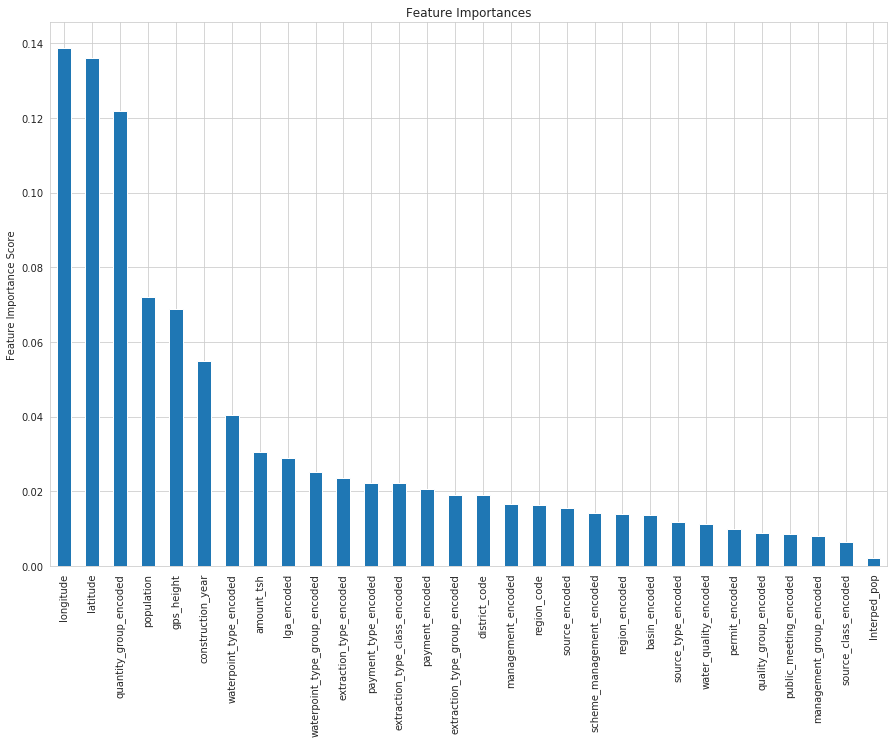

In [24]:
modelfit(RF, dtrain, predictors, 'status_group', objective = 'class', print_feat_imp= True)

**Tuning Step 1**

In [25]:
param_grid = [{
    "max_depth" : [20, 30, 40],
    "min_samples_leaf" : [2,4,8],
    "min_samples_split" : [2, 5, 10],
    "n_estimators" : [125, 150, 175]
}]

clf = GridSearchCV(RF, param_grid=param_grid, cv = 5,
                  scoring = "accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 175}

In [26]:
param_grid = [{
    "max_depth" : [40, 45],
    "min_samples_leaf" : [1,2,3],
    "min_samples_split" : [2],
    "n_estimators" : [175, 180, 185]
}]

clf = GridSearchCV(RF, param_grid=param_grid, cv = 5,
                  scoring = "accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])

{'max_depth': 40,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 185}

In [ ]:
# summarize results
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

In [27]:
RF = RandomForestClassifier(max_depth= 40,
                           min_samples_leaf = 2,
                           min_samples_split = 2,
                           n_estimators = 180)


Model Report
	Accuracy : 0.923114
	Confusion Matrix : 
[[31506   153   600]
 [ 1440  2531   346]
 [ 1915   113 20796]]
	CV Score: Mean = 0.813 | Std = 0.004103 |
 		 Min = 0.8078 | Max = 0.8179


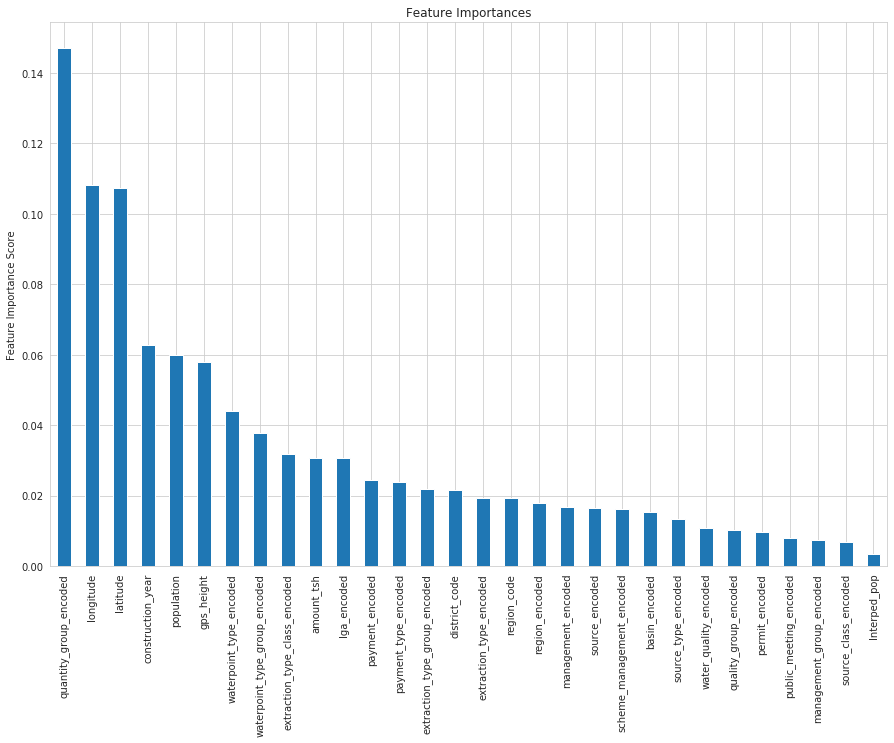

In [28]:
modelfit(RF, dtrain, predictors, 'status_group', objective = 'class', print_feat_imp=True)

**Using Scaled Training Data**

In [242]:
RF = RandomForestClassifier(n_estimators = 100)
RF.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [243]:
predictors_one_hot = [x for x in scaled_df.columns]

In [244]:
le = LabelEncoder()
scaled_df.loc[:, 'status_group'] = le.fit_transform(scaled_df['status_group'])


Model Report
	Accuracy :    1
	Confusion Matrix : 
[[32259     0     0]
 [    0  4317     0]
 [    0     0 22824]]
	CV Score: Mean = 0.9923 | Std = 0.001429 |
 		 Min = 0.9904 | Max = 0.9944


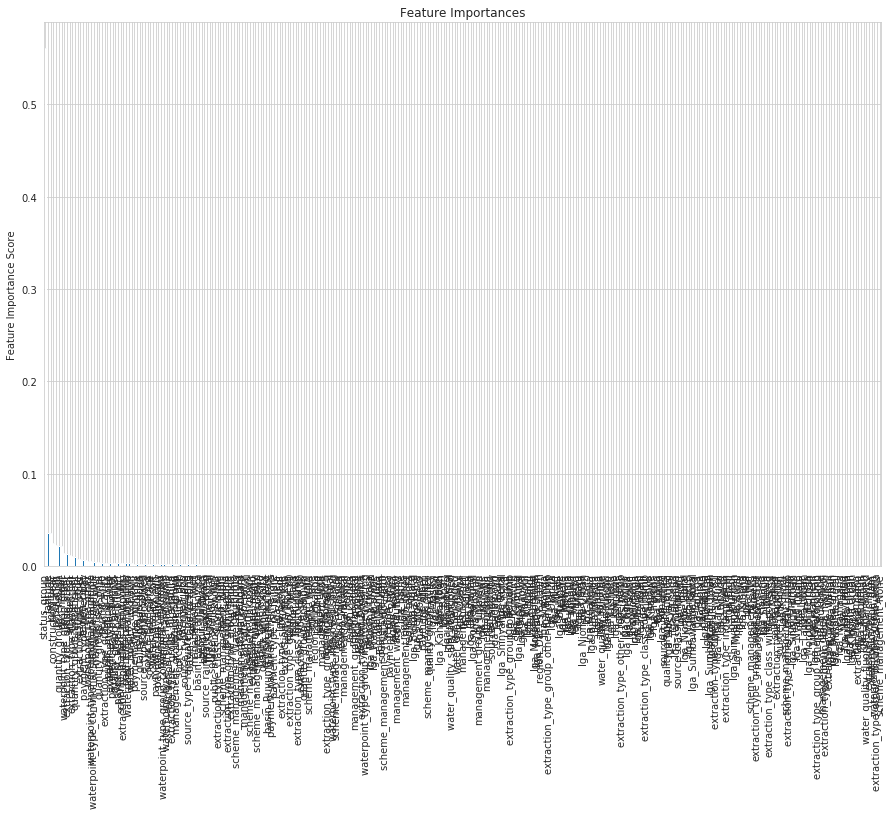

In [262]:
modelfit(RF, scaled_df, predictors = predictors_one_hot, target = 'status_group', objective = 'class', print_feat_imp= True)

In [257]:
RF.fit(scaled_df[predictors_one_hot], scaled_df['status_group'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

([<matplotlib.axis.XTick at 0x7fab2b1e1470>,
 <a list of 20 Text xticklabel objects>)

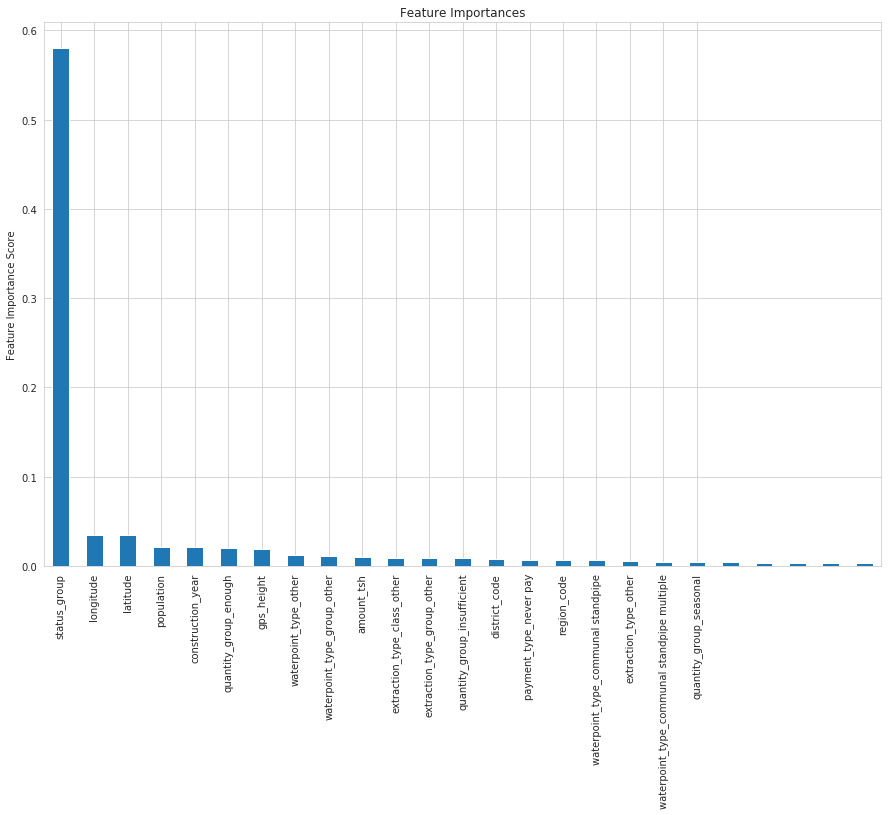

In [260]:
    fig = plt.figure(figsize = (15,10))
    feat_imp = pd.Series(RF.feature_importances_).sort_values(ascending = False)
    top_25 = feat_imp.iloc[:25]
    ax = top_25.plot(kind = "bar", title = "Feature Importances")
    plt.ylabel("Feature Importance Score")
    plt.xticks(rotation = "vertical")
    #The x ticks are shown as the col number by default
    #Here I revise this so they are listed by the feature name
    preds_dict = dict(zip(range(len(predictors_one_hot)), predictors_one_hot))
    x_labels = []
    for el in list(top_twenty.index):
        x_labels.append(preds_dict[el])
    plt.xticks(ticks = np.array(range(20)), 
              labels = x_labels)

#### Predictions

**Preds 1**

+ 'bootstrap': True,
+ 'class_weight': None,
+ 'criterion': 'gini',
+ 'max_depth': 40,
+ 'max_features': 'auto',
+ 'max_leaf_nodes': None,
+ 'min_impurity_decrease': 0.0,
+ 'min_impurity_split': None,
+ 'min_samples_leaf': 2,
+ 'min_samples_split': 2,
+ 'min_weight_fraction_leaf': 0.0,
+ 'n_estimators': 180,
+ 'n_jobs': None,
+ 'oob_score': False,
+ 'random_state': None,
+ 'verbose': 0,
+ 'warm_start': False

In [ ]:
RF.fit(X_train[predictors], y_train['status_group'])

In [ ]:
preds = RF.predict(Final_test.iloc[:, 1:])
preds_df = pd.concat([Final_test['id'], pd.Series(preds, name = 'status_group')], axis = 1)
preds_df.to_csv("Data/Preds/Pred_RF_1.csv", index = False)

### Gradient Boosting

#### Modeling with GB

In [35]:
GBM = GradientBoostingClassifier()
GBM.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


Model Report
	Accuracy : 0.755606
	Confusion Matrix : 
[[29916   126  2217]
 [ 3223   520   574]
 [ 8230   147 14447]]
	CV Score: Mean = 0.7526 | Std = 0.003326 |
 		 Min = 0.7495 | Max = 0.7591


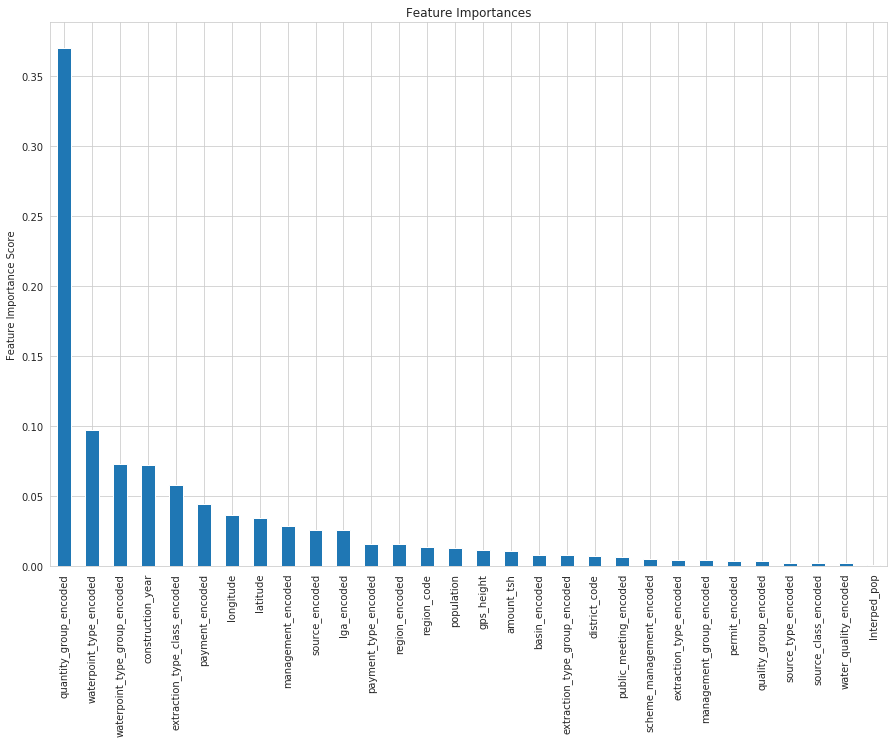

In [36]:
modelfit(GBM, dtrain, predictors, 'status_group', objective = 'class', print_feat_imp=True)

In [40]:
#Tuneing Estimators
param_grid = [{
    "n_estimators" : [250, 500, 750, 1000]
}]


GBM = GradientBoostingClassifier(min_samples_split=3,
                                max_depth=5,
                                max_features="sqrt",
                                subsample=0.8, 
                                min_samples_leaf=3, 
                                random_state = 40)
clf = GridSearchCV(GBM, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

KeyboardInterrupt: 

In [39]:
param_grid = [{
    "max_depth" : range(3, 10, 2),
    "min_samples_split" : range(50, 150, 10)
}]

GBM = GradientBoostingClassifier(n_estimators = 500,
                                max_features="sqrt",
                                subsample=0.8, 
                                min_samples_leaf=3, 
                                random_state = 40)
clf = GridSearchCV(GBM, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

{'max_depth': 9, 'min_samples_split': 100}

In [89]:
param_grid = [{
    "min_samples_leaf" : range(1, 51, 10),
    "subsample" : [i/10. for i in range(6,11)]
}]

GBM = GradientBoostingClassifier(n_estimators = 500,
                                 max_depth=9,
                                 min_samples_split=100,
                                 max_features="sqrt",
                                 random_state = 40)

clf = GridSearchCV(GBM, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

KeyboardInterrupt: 

In [ ]:
param_grid = [{
    "learning_rate" : [.25, .2, .15, .1, .05, .005],
    "loss" : ["huber", "ls"]
}]

GBM = GradientBoostingClassifier(n_estimators = 500,
                                 max_depth=9,
                                 min_samples_split=100,
                                 max_features="sqrt",
                                 random_state = 40)

clf = GridSearchCV(GBM, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_


Model Report
	Accuracy : 0.921549
	Confusion Matrix : 
[[31301   184   774]
 [ 1111  2979   227]
 [ 2241   123 20460]]
	CV Score: Mean = 0.8098 | Std = 0.003017 |
 		 Min = 0.8069 | Max = 0.815


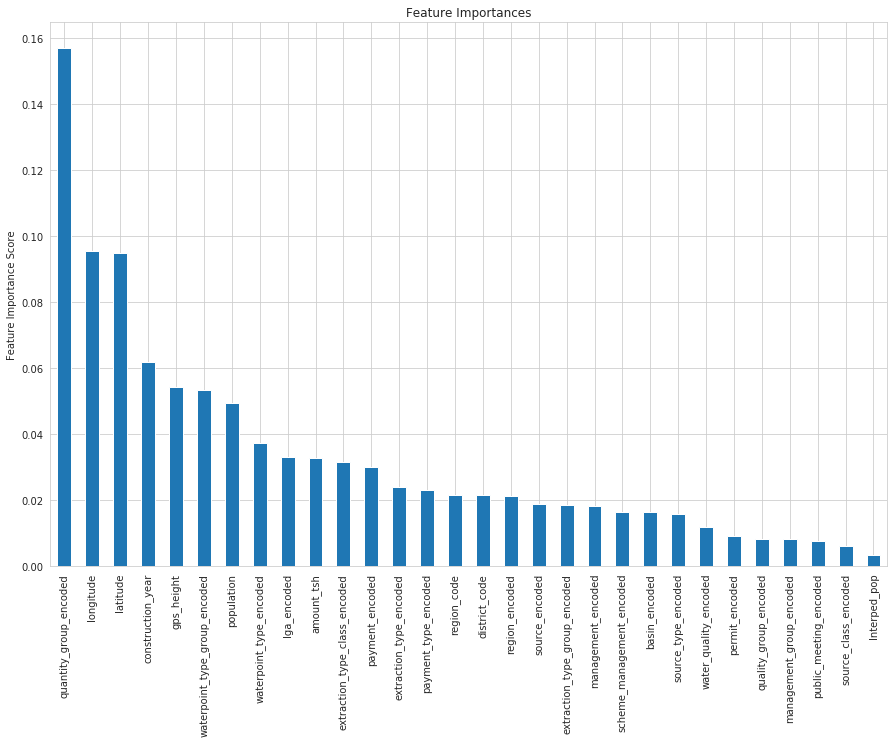

In [87]:
modelfit(GBM, dtrain, predictors, 'status_group', objective = 'class', print_feat_imp=True)

#### Predictions

### XGBoost

#### Modeling with XGB

In [59]:
XGB = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma = 0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    objective="multi:softmax",
                    num_class = 3)

In [60]:
XGB.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 1000,
 'n_jobs': 1,
 'nthread': 4,
 'objective': 'multi:softmax',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': None,
 'subsample': 0.8,
 'verbosity': 1,
 'num_class': 3}


Model Report
	Accuracy : 0.873266
	Confusion Matrix : 
[[30734   230  1295]
 [ 1762  2133   422]
 [ 3672   147 19005]]
	CV Merror rate Training: Mean = 0.1643 | Std = 0.0009073 
 		 Min = 0.1167
	CV Merror rate Testing: Mean = 0.207 | Std = 0.003762 
 		 Min = 0.1947


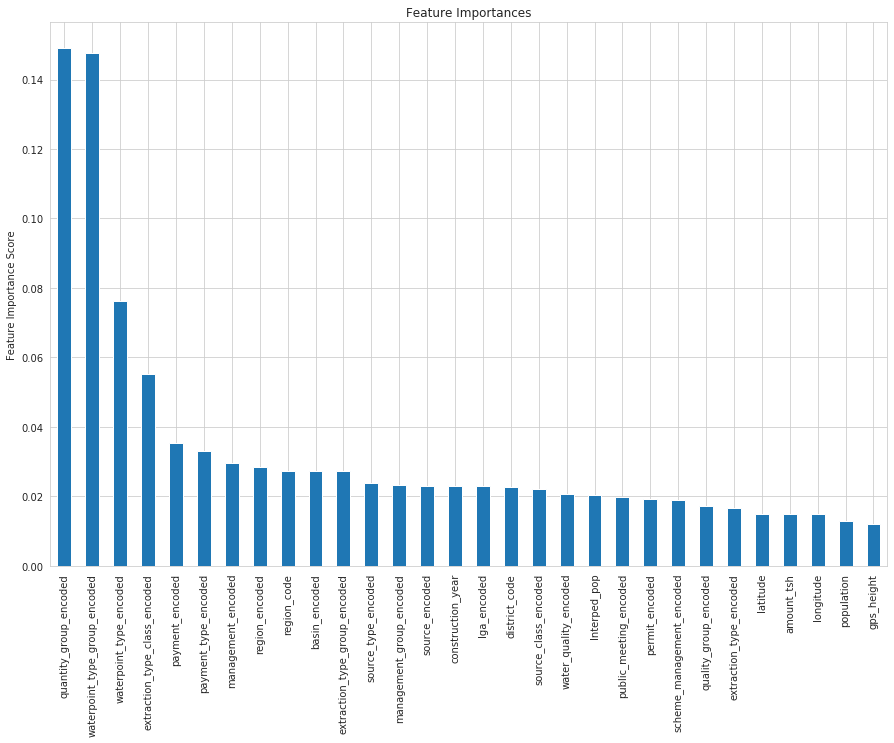

In [61]:
modelfit_xgb(XGB, dtrain, predictors, 'status_group', objective = 'class', eval_metric=metrics.balanced_accuracy_score, early_stopping_rounds=None)

In [62]:
eval_set = [(X_train_split, y_train_split), (X_test_split, y_test_split)]
XGB.fit(X_train_split, y_train_split.values.ravel(), eval_metric=["merror", "mlogloss"], eval_set=eval_set)

[0]	validation_0-merror:0.279377	validation_0-mlogloss:1.04116	validation_1-merror:0.28367	validation_1-mlogloss:1.04171


/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-merror:0.277841	validation_0-mlogloss:0.996056	validation_1-merror:0.280303	validation_1-mlogloss:0.997271
[2]	validation_0-merror:0.274979	validation_0-mlogloss:0.957073	validation_1-merror:0.277189	validation_1-mlogloss:0.958852
[3]	validation_0-merror:0.273822	validation_0-mlogloss:0.926696	validation_1-merror:0.276263	validation_1-mlogloss:0.928936
[4]	validation_0-merror:0.271633	validation_0-mlogloss:0.896288	validation_1-merror:0.27399	validation_1-mlogloss:0.899065
[5]	validation_0-merror:0.270918	validation_0-mlogloss:0.866647	validation_1-merror:0.274158	validation_1-mlogloss:0.869768
[6]	validation_0-merror:0.269465	validation_0-mlogloss:0.840587	validation_1-merror:0.271465	validation_1-mlogloss:0.844127
[7]	validation_0-merror:0.26976	validation_0-mlogloss:0.819345	validation_1-merror:0.272054	validation_1-mlogloss:0.82314
[8]	validation_0-merror:0.269928	validation_0-mlogloss:0.798736	validation_1-merror:0.273232	validation_1-mlogloss:0.802952
[9]	validat

[67]	validation_0-merror:0.233123	validation_0-mlogloss:0.559382	validation_1-merror:0.24335	validation_1-mlogloss:0.578005
[68]	validation_0-merror:0.233228	validation_0-mlogloss:0.558542	validation_1-merror:0.243266	validation_1-mlogloss:0.577299
[69]	validation_0-merror:0.232513	validation_0-mlogloss:0.557132	validation_1-merror:0.242761	validation_1-mlogloss:0.576269
[70]	validation_0-merror:0.23186	validation_0-mlogloss:0.556217	validation_1-merror:0.242003	validation_1-mlogloss:0.575509
[71]	validation_0-merror:0.231923	validation_0-mlogloss:0.554969	validation_1-merror:0.241582	validation_1-mlogloss:0.574462
[72]	validation_0-merror:0.231671	validation_0-mlogloss:0.554192	validation_1-merror:0.240909	validation_1-mlogloss:0.573878
[73]	validation_0-merror:0.231292	validation_0-mlogloss:0.553207	validation_1-merror:0.241077	validation_1-mlogloss:0.572962
[74]	validation_0-merror:0.231019	validation_0-mlogloss:0.552512	validation_1-merror:0.240404	validation_1-mlogloss:0.572499
[7

[133]	validation_0-merror:0.208333	validation_0-mlogloss:0.508886	validation_1-merror:0.221128	validation_1-mlogloss:0.541251
[134]	validation_0-merror:0.208165	validation_0-mlogloss:0.508624	validation_1-merror:0.22096	validation_1-mlogloss:0.541053
[135]	validation_0-merror:0.208354	validation_0-mlogloss:0.508257	validation_1-merror:0.220875	validation_1-mlogloss:0.540822
[136]	validation_0-merror:0.208291	validation_0-mlogloss:0.507738	validation_1-merror:0.220623	validation_1-mlogloss:0.540555
[137]	validation_0-merror:0.207786	validation_0-mlogloss:0.507346	validation_1-merror:0.220707	validation_1-mlogloss:0.540336
[138]	validation_0-merror:0.207618	validation_0-mlogloss:0.506921	validation_1-merror:0.22096	validation_1-mlogloss:0.540153
[139]	validation_0-merror:0.207513	validation_0-mlogloss:0.506404	validation_1-merror:0.220202	validation_1-mlogloss:0.539742
[140]	validation_0-merror:0.207239	validation_0-mlogloss:0.50587	validation_1-merror:0.220707	validation_1-mlogloss:0.53

[199]	validation_0-merror:0.19455	validation_0-mlogloss:0.479527	validation_1-merror:0.212795	validation_1-mlogloss:0.524248
[200]	validation_0-merror:0.194234	validation_0-mlogloss:0.478967	validation_1-merror:0.212795	validation_1-mlogloss:0.523992
[201]	validation_0-merror:0.194003	validation_0-mlogloss:0.478461	validation_1-merror:0.212626	validation_1-mlogloss:0.523714
[202]	validation_0-merror:0.193729	validation_0-mlogloss:0.477889	validation_1-merror:0.212374	validation_1-mlogloss:0.523402
[203]	validation_0-merror:0.193203	validation_0-mlogloss:0.477447	validation_1-merror:0.212037	validation_1-mlogloss:0.523256
[204]	validation_0-merror:0.193308	validation_0-mlogloss:0.477083	validation_1-merror:0.211953	validation_1-mlogloss:0.523089
[205]	validation_0-merror:0.193245	validation_0-mlogloss:0.476777	validation_1-merror:0.211953	validation_1-mlogloss:0.522987
[206]	validation_0-merror:0.193098	validation_0-mlogloss:0.476295	validation_1-merror:0.211785	validation_1-mlogloss:0.

[265]	validation_0-merror:0.182933	validation_0-mlogloss:0.45528	validation_1-merror:0.208081	validation_1-mlogloss:0.512962
[266]	validation_0-merror:0.182807	validation_0-mlogloss:0.454969	validation_1-merror:0.208165	validation_1-mlogloss:0.512756
[267]	validation_0-merror:0.182849	validation_0-mlogloss:0.454767	validation_1-merror:0.207744	validation_1-mlogloss:0.512713
[268]	validation_0-merror:0.182744	validation_0-mlogloss:0.454473	validation_1-merror:0.207239	validation_1-mlogloss:0.512546
[269]	validation_0-merror:0.182681	validation_0-mlogloss:0.4543	validation_1-merror:0.207492	validation_1-mlogloss:0.512531
[270]	validation_0-merror:0.18266	validation_0-mlogloss:0.453893	validation_1-merror:0.207997	validation_1-mlogloss:0.512432
[271]	validation_0-merror:0.182471	validation_0-mlogloss:0.453638	validation_1-merror:0.207997	validation_1-mlogloss:0.512321
[272]	validation_0-merror:0.182365	validation_0-mlogloss:0.453306	validation_1-merror:0.207997	validation_1-mlogloss:0.512

[331]	validation_0-merror:0.174558	validation_0-mlogloss:0.436511	validation_1-merror:0.205135	validation_1-mlogloss:0.505853
[332]	validation_0-merror:0.174327	validation_0-mlogloss:0.43617	validation_1-merror:0.204545	validation_1-mlogloss:0.505781
[333]	validation_0-merror:0.174116	validation_0-mlogloss:0.435918	validation_1-merror:0.204966	validation_1-mlogloss:0.505763
[334]	validation_0-merror:0.174074	validation_0-mlogloss:0.435722	validation_1-merror:0.204798	validation_1-mlogloss:0.505691
[335]	validation_0-merror:0.173927	validation_0-mlogloss:0.435481	validation_1-merror:0.20505	validation_1-mlogloss:0.505591
[336]	validation_0-merror:0.173885	validation_0-mlogloss:0.43529	validation_1-merror:0.204882	validation_1-mlogloss:0.505591
[337]	validation_0-merror:0.173737	validation_0-mlogloss:0.435153	validation_1-merror:0.204966	validation_1-mlogloss:0.505576
[338]	validation_0-merror:0.173611	validation_0-mlogloss:0.434884	validation_1-merror:0.204798	validation_1-mlogloss:0.50

[397]	validation_0-merror:0.167193	validation_0-mlogloss:0.420213	validation_1-merror:0.202104	validation_1-mlogloss:0.501074
[398]	validation_0-merror:0.167298	validation_0-mlogloss:0.419964	validation_1-merror:0.201768	validation_1-mlogloss:0.500981
[399]	validation_0-merror:0.167277	validation_0-mlogloss:0.419711	validation_1-merror:0.201768	validation_1-mlogloss:0.500965
[400]	validation_0-merror:0.167214	validation_0-mlogloss:0.419412	validation_1-merror:0.201936	validation_1-mlogloss:0.500933
[401]	validation_0-merror:0.167109	validation_0-mlogloss:0.419192	validation_1-merror:0.201852	validation_1-mlogloss:0.500894
[402]	validation_0-merror:0.16694	validation_0-mlogloss:0.419051	validation_1-merror:0.201852	validation_1-mlogloss:0.500892
[403]	validation_0-merror:0.167003	validation_0-mlogloss:0.418837	validation_1-merror:0.201515	validation_1-mlogloss:0.50077
[404]	validation_0-merror:0.166856	validation_0-mlogloss:0.418608	validation_1-merror:0.201852	validation_1-mlogloss:0.5

[463]	validation_0-merror:0.160396	validation_0-mlogloss:0.406174	validation_1-merror:0.200505	validation_1-mlogloss:0.496771
[464]	validation_0-merror:0.160311	validation_0-mlogloss:0.406026	validation_1-merror:0.200505	validation_1-mlogloss:0.496736
[465]	validation_0-merror:0.160143	validation_0-mlogloss:0.405854	validation_1-merror:0.200421	validation_1-mlogloss:0.496719
[466]	validation_0-merror:0.160038	validation_0-mlogloss:0.405702	validation_1-merror:0.200253	validation_1-mlogloss:0.496693
[467]	validation_0-merror:0.159954	validation_0-mlogloss:0.405458	validation_1-merror:0.200337	validation_1-mlogloss:0.49663
[468]	validation_0-merror:0.159848	validation_0-mlogloss:0.405245	validation_1-merror:0.200084	validation_1-mlogloss:0.496616
[469]	validation_0-merror:0.159512	validation_0-mlogloss:0.404964	validation_1-merror:0.2	validation_1-mlogloss:0.496526
[470]	validation_0-merror:0.159428	validation_0-mlogloss:0.404788	validation_1-merror:0.199832	validation_1-mlogloss:0.49645

[529]	validation_0-merror:0.153598	validation_0-mlogloss:0.392225	validation_1-merror:0.197138	validation_1-mlogloss:0.493547
[530]	validation_0-merror:0.153641	validation_0-mlogloss:0.392011	validation_1-merror:0.197222	validation_1-mlogloss:0.493471
[531]	validation_0-merror:0.15362	validation_0-mlogloss:0.3918	validation_1-merror:0.197138	validation_1-mlogloss:0.49345
[532]	validation_0-merror:0.153598	validation_0-mlogloss:0.391664	validation_1-merror:0.196886	validation_1-mlogloss:0.493495
[533]	validation_0-merror:0.153346	validation_0-mlogloss:0.391474	validation_1-merror:0.197306	validation_1-mlogloss:0.49344
[534]	validation_0-merror:0.153367	validation_0-mlogloss:0.391266	validation_1-merror:0.197054	validation_1-mlogloss:0.493401
[535]	validation_0-merror:0.153199	validation_0-mlogloss:0.391102	validation_1-merror:0.197054	validation_1-mlogloss:0.49334
[536]	validation_0-merror:0.153283	validation_0-mlogloss:0.390882	validation_1-merror:0.197222	validation_1-mlogloss:0.49330

[595]	validation_0-merror:0.147917	validation_0-mlogloss:0.379981	validation_1-merror:0.197306	validation_1-mlogloss:0.491125
[596]	validation_0-merror:0.147917	validation_0-mlogloss:0.379848	validation_1-merror:0.197222	validation_1-mlogloss:0.491102
[597]	validation_0-merror:0.147769	validation_0-mlogloss:0.379706	validation_1-merror:0.197138	validation_1-mlogloss:0.491049
[598]	validation_0-merror:0.147685	validation_0-mlogloss:0.379521	validation_1-merror:0.197391	validation_1-mlogloss:0.491029
[599]	validation_0-merror:0.147601	validation_0-mlogloss:0.379288	validation_1-merror:0.197222	validation_1-mlogloss:0.490956
[600]	validation_0-merror:0.147517	validation_0-mlogloss:0.379135	validation_1-merror:0.197475	validation_1-mlogloss:0.49094
[601]	validation_0-merror:0.147517	validation_0-mlogloss:0.379023	validation_1-merror:0.197475	validation_1-mlogloss:0.490961
[602]	validation_0-merror:0.147348	validation_0-mlogloss:0.378887	validation_1-merror:0.197306	validation_1-mlogloss:0.

[661]	validation_0-merror:0.141372	validation_0-mlogloss:0.368715	validation_1-merror:0.197138	validation_1-mlogloss:0.488742
[662]	validation_0-merror:0.141246	validation_0-mlogloss:0.36851	validation_1-merror:0.197138	validation_1-mlogloss:0.488692
[663]	validation_0-merror:0.141267	validation_0-mlogloss:0.368377	validation_1-merror:0.197222	validation_1-mlogloss:0.488692
[664]	validation_0-merror:0.141309	validation_0-mlogloss:0.368142	validation_1-merror:0.197138	validation_1-mlogloss:0.488669
[665]	validation_0-merror:0.141183	validation_0-mlogloss:0.367917	validation_1-merror:0.197306	validation_1-mlogloss:0.488625
[666]	validation_0-merror:0.141035	validation_0-mlogloss:0.367769	validation_1-merror:0.197222	validation_1-mlogloss:0.488585
[667]	validation_0-merror:0.140888	validation_0-mlogloss:0.367565	validation_1-merror:0.197054	validation_1-mlogloss:0.488494
[668]	validation_0-merror:0.140783	validation_0-mlogloss:0.367402	validation_1-merror:0.197054	validation_1-mlogloss:0.

[727]	validation_0-merror:0.136742	validation_0-mlogloss:0.358256	validation_1-merror:0.19596	validation_1-mlogloss:0.487228
[728]	validation_0-merror:0.136806	validation_0-mlogloss:0.358106	validation_1-merror:0.196128	validation_1-mlogloss:0.487235
[729]	validation_0-merror:0.136553	validation_0-mlogloss:0.357967	validation_1-merror:0.196044	validation_1-mlogloss:0.487266
[730]	validation_0-merror:0.136595	validation_0-mlogloss:0.357876	validation_1-merror:0.196128	validation_1-mlogloss:0.487207
[731]	validation_0-merror:0.136427	validation_0-mlogloss:0.357757	validation_1-merror:0.196128	validation_1-mlogloss:0.487179
[732]	validation_0-merror:0.136469	validation_0-mlogloss:0.357584	validation_1-merror:0.196465	validation_1-mlogloss:0.487157
[733]	validation_0-merror:0.136448	validation_0-mlogloss:0.357444	validation_1-merror:0.196465	validation_1-mlogloss:0.487171
[734]	validation_0-merror:0.136364	validation_0-mlogloss:0.357263	validation_1-merror:0.196212	validation_1-mlogloss:0.

[793]	validation_0-merror:0.131692	validation_0-mlogloss:0.34838	validation_1-merror:0.19596	validation_1-mlogloss:0.486044
[794]	validation_0-merror:0.131524	validation_0-mlogloss:0.348265	validation_1-merror:0.19596	validation_1-mlogloss:0.485992
[795]	validation_0-merror:0.131292	validation_0-mlogloss:0.348054	validation_1-merror:0.195791	validation_1-mlogloss:0.485908
[796]	validation_0-merror:0.131187	validation_0-mlogloss:0.347906	validation_1-merror:0.195875	validation_1-mlogloss:0.485935
[797]	validation_0-merror:0.131103	validation_0-mlogloss:0.347758	validation_1-merror:0.195875	validation_1-mlogloss:0.485934
[798]	validation_0-merror:0.130829	validation_0-mlogloss:0.347571	validation_1-merror:0.195455	validation_1-mlogloss:0.485906
[799]	validation_0-merror:0.13085	validation_0-mlogloss:0.347445	validation_1-merror:0.195539	validation_1-mlogloss:0.485895
[800]	validation_0-merror:0.130892	validation_0-mlogloss:0.347316	validation_1-merror:0.195539	validation_1-mlogloss:0.485

[859]	validation_0-merror:0.126536	validation_0-mlogloss:0.339322	validation_1-merror:0.19537	validation_1-mlogloss:0.484926
[860]	validation_0-merror:0.126473	validation_0-mlogloss:0.339134	validation_1-merror:0.195286	validation_1-mlogloss:0.48492
[861]	validation_0-merror:0.126305	validation_0-mlogloss:0.338994	validation_1-merror:0.195455	validation_1-mlogloss:0.484914
[862]	validation_0-merror:0.126136	validation_0-mlogloss:0.338882	validation_1-merror:0.195455	validation_1-mlogloss:0.484882
[863]	validation_0-merror:0.126284	validation_0-mlogloss:0.338717	validation_1-merror:0.195034	validation_1-mlogloss:0.484873
[864]	validation_0-merror:0.126178	validation_0-mlogloss:0.338537	validation_1-merror:0.194949	validation_1-mlogloss:0.484865
[865]	validation_0-merror:0.126178	validation_0-mlogloss:0.338402	validation_1-merror:0.194865	validation_1-mlogloss:0.48486
[866]	validation_0-merror:0.126136	validation_0-mlogloss:0.33828	validation_1-merror:0.194865	validation_1-mlogloss:0.484

[925]	validation_0-merror:0.122643	validation_0-mlogloss:0.330348	validation_1-merror:0.195118	validation_1-mlogloss:0.484249
[926]	validation_0-merror:0.122496	validation_0-mlogloss:0.330149	validation_1-merror:0.194781	validation_1-mlogloss:0.484152
[927]	validation_0-merror:0.122454	validation_0-mlogloss:0.330016	validation_1-merror:0.194949	validation_1-mlogloss:0.484121
[928]	validation_0-merror:0.122496	validation_0-mlogloss:0.329803	validation_1-merror:0.194949	validation_1-mlogloss:0.484039
[929]	validation_0-merror:0.122454	validation_0-mlogloss:0.329661	validation_1-merror:0.195118	validation_1-mlogloss:0.48403
[930]	validation_0-merror:0.122327	validation_0-mlogloss:0.32957	validation_1-merror:0.195118	validation_1-mlogloss:0.484018
[931]	validation_0-merror:0.122348	validation_0-mlogloss:0.329437	validation_1-merror:0.195118	validation_1-mlogloss:0.484023
[932]	validation_0-merror:0.122201	validation_0-mlogloss:0.329309	validation_1-merror:0.195286	validation_1-mlogloss:0.4

[991]	validation_0-merror:0.118119	validation_0-mlogloss:0.322032	validation_1-merror:0.19335	validation_1-mlogloss:0.483423
[992]	validation_0-merror:0.117971	validation_0-mlogloss:0.321879	validation_1-merror:0.193603	validation_1-mlogloss:0.483428
[993]	validation_0-merror:0.117887	validation_0-mlogloss:0.321788	validation_1-merror:0.193519	validation_1-mlogloss:0.483402
[994]	validation_0-merror:0.117803	validation_0-mlogloss:0.321647	validation_1-merror:0.193434	validation_1-mlogloss:0.483422
[995]	validation_0-merror:0.117614	validation_0-mlogloss:0.321517	validation_1-merror:0.19335	validation_1-mlogloss:0.483483
[996]	validation_0-merror:0.117614	validation_0-mlogloss:0.321399	validation_1-merror:0.193434	validation_1-mlogloss:0.483499
[997]	validation_0-merror:0.117424	validation_0-mlogloss:0.321272	validation_1-merror:0.193182	validation_1-mlogloss:0.483478
[998]	validation_0-merror:0.117466	validation_0-mlogloss:0.321204	validation_1-merror:0.193182	validation_1-mlogloss:0.4

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=None, subsample=0.8, verbosity=1)

In [85]:
# retrieve performance metrics
results = XGB.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

AttributeError: 'XGBClassifier' object has no attribute 'evals_result_'

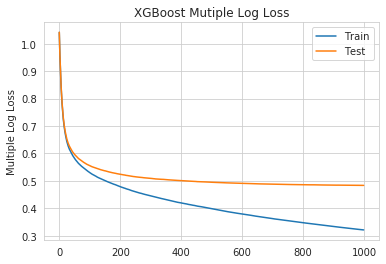

In [82]:
# plot mlogloss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Multiple Log Loss')
plt.title('XGBoost Mutiple Log Loss')
plt.show()

Text(0.5, 1.0, 'XGBoost Multiple Classification Error')

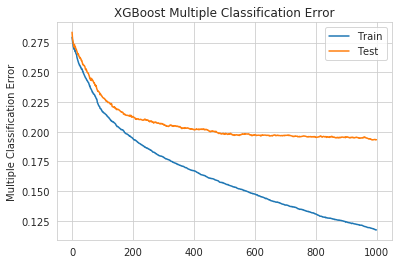

In [83]:
# plot classification merror
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Multiple Classification Error')
plt.title('XGBoost Multiple Classification Error')

In [66]:
#Tuneing n_estimators
param_grid = [{
    "n_estimators" : [550, 600, 650]
}]

clf = GridSearchCV(XGB, param_grid=param_grid, scoring = "accuracy", cv = 5)
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

{'n_estimators': 650}

In [67]:
#Tuneing max_depth, min_child_weight
#Using n_estimators found above
param_grid = [{
    "max_depth" : range(3, 10, 2),
    "min_child_weight" : range(1, 6, 2)
}]

#Filtering Warnings
XGB = XGBClassifier(learning_rate=0.1,
                    n_estimators=650,
                    gamma = 0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    objective="multi:softmax",
                    num_class = 3)

clf = GridSearchCV(XGB, param_grid=param_grid, scoring = "balanced_accuracy", cv = 5)
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

{'max_depth': 9, 'min_child_weight': 1}

In [68]:
XGB = XGBClassifier(learning_rate=0.1,
                    n_estimators=650,
                    max_depth = 9,
                    min_child_weight= 1,
                    gamma = 0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    objective="multi:softmax",
                    num_class = 3)


Model Report
	Accuracy : 0.910842
	Confusion Matrix : 
[[31362   172   725]
 [ 1340  2678   299]
 [ 2641   119 20064]]
	CV Merror rate Training: Mean = 0.13 | Std = 0.001252 
 		 Min = 0.07774
	CV Merror rate Testing: Mean = 0.1972 | Std = 0.00265 
 		 Min = 0.1875


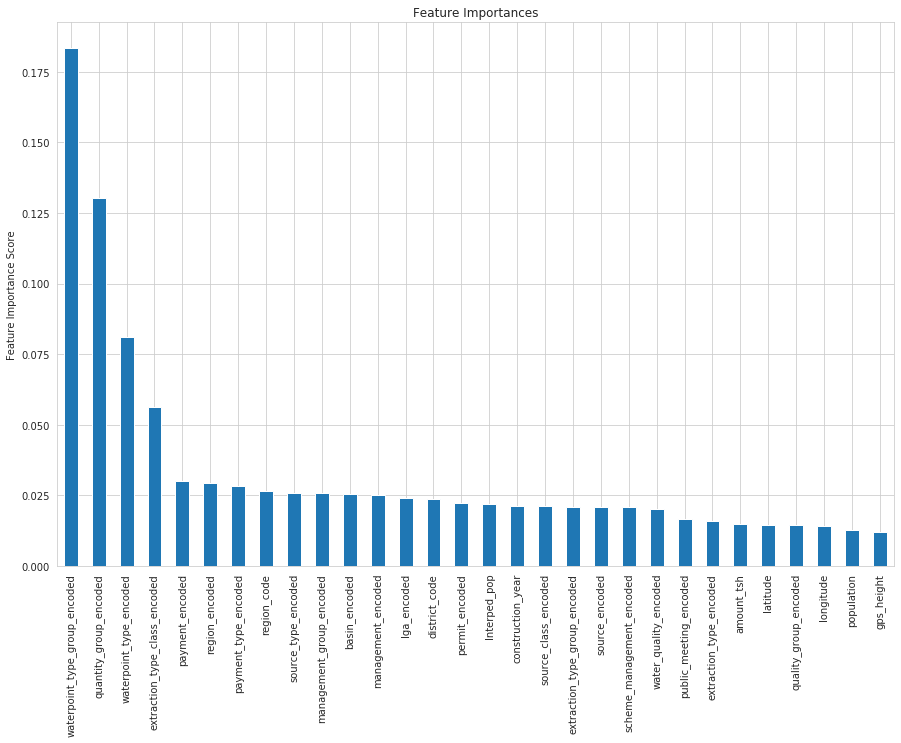

In [70]:
modelfit_xgb(XGB, dtrain, predictors, 'status_group', objective = 'class', eval_metric=metrics.balanced_accuracy_score)

#### Predictions

In [75]:
le = LabelEncoder()

In [76]:
le.fit(y_train['status_group'])

LabelEncoder()

**Pred 1**

This first set of predictions is built using the XGB model with the following parameters:
+ learning_rate=0.1
+ n_estimators=1250
+ max_depth=5
+ min_child_weight=1
+ gamma = 0
+ subsample=0.8
+ colsample_bytree=0.8
+ nthread=4
+ scale_pos_weight=1
+ seed=27
+ objective="multi:softmax"
+ num_class = 3

In [ ]:
XGB.fit(X_train[predictors], y_train['status_group'])

In [ ]:
preds = XGB.predict(Final_test.iloc[:, 1:])
preds_df = pd.concat([Final_test['id'], pd.Series(preds, name = 'status_group')], axis = 1)
preds_df.to_csv("Data/Preds/Pred_XGB_1.csv", index = False)

**Pred 2**

This set of predictions is built using the XGB model with the following parameters:
+ learning_rate=0.1
+ n_estimators=1500
+ max_depth = 7
+ min_child_weight= 3
+ gamma = 0
+ subsample=0.8
+ colsample_bytree=0.8
+ nthread=4
+ scale_pos_weight=1
+ seed=27
+ objective="multi:softmax"
+ num_class = 3

In [ ]:
XGB.fit(dtrain[predictors], dtrain['status_group'])

In [ ]:
preds = XGB.predict(Final_test.iloc[:, 1:])
preds_df = pd.concat([Final_test['id'], pd.Series(preds, name = 'status_group')], axis = 1)
preds_df.to_csv("Data/Preds/Pred_XGB_2.csv", index = False)

**Pred 3**

This set of predictions is built using the XGB model with the following parameters:
+ learning_rate=0.1
+ n_estimators=650
+ max_depth = 9
+ min_child_weight= 1
+ gamma = 0
+ subsample=0.8
+ colsample_bytree=0.8
+ nthread=4
+ scale_pos_weight=1
+ seed=27
+ objective="multi:softmax"
+ num_class = 3

In [73]:
XGB.fit(dtrain[predictors], dtrain['status_group'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=287, n_jobs=1,
              nthread=4, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=None, subsample=0.8, verbosity=1)

In [80]:
preds = XGB.predict(Final_test.iloc[:, 1:])
preds = le.inverse_transform(preds)
preds_df = pd.concat([Final_test['id'], pd.Series(preds, name = 'status_group')], axis = 1)
preds_df.to_csv("Data/Preds/Pred_XGB_3.csv", index = False)

## Modeling Conclusion